# Your info

Full name: AmirHossein Ahmadi

Student ID: 97522292

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

In [170]:
import numpy as np
import matplotlib.pyplot as plt

class Q1_A_Kohonen:
    
    def __init__(self, n, learning_rate=0.1, epochs=100, sigma=4):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(n**2, 3)
        self.n = n
        self.sigma = sigma

    def get_dists_2(self, x, y):
        i, j = np.indices((self.n, self.n))
        return (i - x) ** 2 + (j - y) ** 2

    def train(self, training_inputs):
        for _ in range(self.epochs):
            for training_input in training_inputs:
                winner_w = np.argmin(np.sum(np.square(np.subtract(self.weights, training_input)), axis=1))
                
                ww_x = winner_w // self.n
                ww_y = winner_w %  self.n

                dist_2 = self.get_dists_2(ww_x, ww_y).reshape(-1,1)

                self.weights += np.multiply(training_input - self.weights, np.exp((-dist_2) / (2 * (self.sigma ** 2)))) * self.learning_rate
            

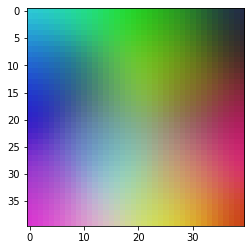

In [171]:
kohonen = Q1_A_Kohonen(40)
training_inputs = np.random.rand(1600, 3)

kohonen.train(training_inputs)

plt.imshow(kohonen.weights.reshape(40, 40, 3))
plt.show()
    


# Q1.B. Kohonen

In [172]:
import numpy as np
import matplotlib.pyplot as plt

class Q1_B_C_Kohonen:
    
    def __init__(self, n, learning_rate=0.1, epochs=100, sigma=4, d_sigma=1, d_learning_rate=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(n**2, 3)
        self.n = n
        self.sigma = sigma
        self.d_sigma = d_sigma
        self.d_learning_rate = d_learning_rate

    def get_dists_2(self, x, y):
        i, j = np.indices((self.n, self.n))
        return (i - x) ** 2 + (j - y) ** 2

    def train(self, training_inputs):
        for _ in range(self.epochs):
            for training_input in training_inputs:
                winner_w = np.argmin(np.sum(np.square(np.subtract(self.weights, training_input)), axis=1))
                
                ww_x = winner_w // self.n
                ww_y = winner_w %  self.n

                dist_2 = self.get_dists_2(ww_x, ww_y).reshape(-1,1)

                self.weights += np.multiply(training_input - self.weights, np.exp((-dist_2) / (2 * (self.sigma ** 2)))) * self.learning_rate
            self.learning_rate *= self.d_learning_rate
            self.sigma *= self.d_sigma

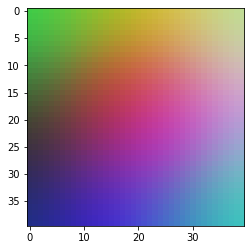

In [173]:
# 1_B
kohonen = Q1_B_C_Kohonen(40, learning_rate=1, sigma=6, d_learning_rate=.9)
training_inputs = np.random.rand(1600, 3)

kohonen.train(training_inputs)

plt.imshow(kohonen.weights.reshape(40, 40, 3))
plt.show()
    

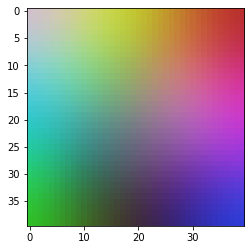

In [175]:
# 1_C
kohonen = Q1_B_C_Kohonen(40, learning_rate=1, sigma=10, d_learning_rate=.9, d_sigma=.99)
training_inputs = np.random.rand(1600, 3)

kohonen.train(training_inputs)

plt.imshow(kohonen.weights.reshape(40,40,3))
plt.show()


# Q2.A. MLP

Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4668
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.2003
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1729
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1946
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1727
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1469
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 11/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1687
Epoch 12/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 13/100
75/75 [=================

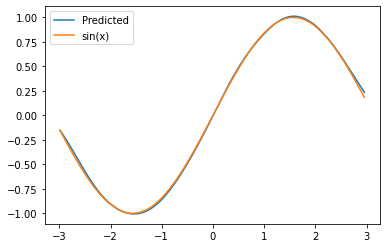

In [176]:
#write your code here

import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

# Generate training data
num_samples = 300
x_train = (np.random.rand(num_samples) * 6) - 3
x_train.reshape(num_samples, 1)
y_train = np.sin(x_train)

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=(1,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(1))

# Train
model.compile(loss='mean_squared_error', optimizer='adam')
train_history = model.fit(x_train, y_train, epochs=100, batch_size=4)

# Generate test data
num_tests = 200
x_test = (np.random.rand(num_tests) * 6) - 3
x_test.reshape(num_tests, 1)
y_test = np.sin(x_test)

# Predict
predicted_y = model.predict(x_test)

# Sort based on x
idx = np.argsort(x_test)
x_test = np.array(x_test)[idx]
y_test = np.array(y_test)[idx]
predicted_y = np.array(predicted_y)[idx]

# Plot 
plt.plot(x_test, predicted_y, label='Predicted')
plt.plot(x_test, y_test, label='sin(x)')
plt.legend()
plt.show()

# Q2.B. RBF

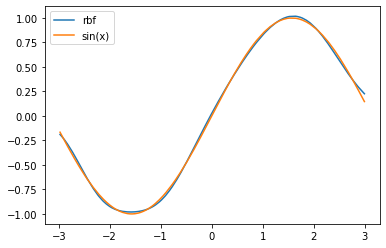

In [177]:
import numpy as np
import matplotlib.pyplot as plt

class RBF:
    def __init__(self):
        self.hidden_shape = 8
        self.centers = None
        self.weights = None

    def calculate_interpolation_matrix(self, x):
        i, j = np.indices((len(x), self.hidden_shape))
        return np.exp(-(self.centers[j] - x[i])**2)

    def fit(self, x, y):
        random_args = np.random.choice(len(x), self.hidden_shape)
        self.centers = x[random_args]
        matrix = self.calculate_interpolation_matrix(x)
        self.weights = np.dot(np.linalg.pinv(matrix), y)

    def predict(self, x):
        matrix = self.calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

# Generate training data
num_samples = 200
x_train = (np.random.rand(num_samples) * 6) - 3
x_train.reshape(num_samples, 1)
y_train = np.sin(x_train)

# Train
rbf_model = RBF()
rbf_model.fit(x_train, y_train)

# Generate test data
num_tests = 200
x_test = (np.random.rand(num_tests) * 6) - 3
x_test.reshape(num_tests, 1)
y_test = np.sin(x_test)

# Predict
predicted_y = rbf_model.predict(x_test)

# Sort based on x
idx = np.argsort(x_test)
x_test = np.array(x_test)[idx]
y_test = np.array(y_test)[idx]
predicted_y = np.array(predicted_y)[idx]

# Plot 
plt.plot(x_test, predicted_y, label='rbf')
plt.plot(x_test, y_test, label='sin(x)')
plt.legend()
plt.show()

# Q2.C. Compare

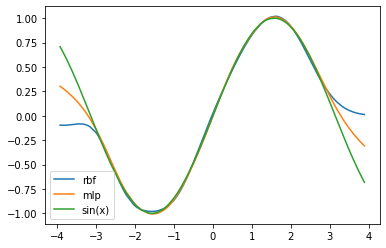

In [178]:
#write your code here

# Generate test data
num_tests = 200
x_test = (np.random.rand(num_tests) * 8) - 4
x_test.reshape(num_tests, 1)
y_test = np.sin(x_test)

# Predict
predicted_y_rbf = rbf_model.predict(x_test)
predicted_y_mlp = model.predict(x_test)

# Sort based on x
idx = np.argsort(x_test)
x_test = np.array(x_test)[idx]
y_test = np.array(y_test)[idx]
predicted_y_rbf = np.array(predicted_y_rbf)[idx]
predicted_y_mlp = np.array(predicted_y_mlp)[idx]

# Plot 
plt.plot(x_test, predicted_y_rbf, label='rbf')
plt.plot(x_test, predicted_y_mlp, label='mlp')
plt.plot(x_test, y_test, label='sin(x)')
plt.legend()
plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.